# 3. Load Titanic-Dataset

## _. Import library

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns

In [21]:
df = pd.read_csv('./data_pd/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
len(df)

891

## 3.1. Check nan value in dataset which selected columns

In [24]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3.2. Remove missing Data in 'Age' column (177 missing values)

In [25]:
df = df.dropna(subset=['Age'])
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

## 3.3. Perform data cleaning and data transformation by converting all Age data to numerical type

In [26]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 54.  ,  2.  , 27.  , 14.  ,  4.  ,
       58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [28]:
# Replace invalid age values (e.g., negative ages, equal 0, or float value < 1, more than 120) with NaN
df[df['Age'] < 1] = np.nan
df[df['Age'] > 120] = np.nan

df = df.dropna(subset=['Age'])
df['Age'] = df['Age'].astype(int)
df['Age'].value_counts()

Age
24    31
22    27
28    27
30    27
18    26
      ..
66     1
53     1
80     1
12     1
74     1
Name: count, Length: 70, dtype: int64

In [29]:
# Removing non-numeric characters and convert the column to numeric type
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Check values are ourlier
df['Age'].value_counts()

Age
24    31
22    27
28    27
30    27
18    26
      ..
66     1
53     1
80     1
12     1
74     1
Name: count, Length: 70, dtype: int64

In [32]:
# Displaying cleaned Age column statistics to verify the result
print(df['Age'].describe())

count    707.000000
mean      29.973126
std       14.303296
min        1.000000
25%       21.000000
50%       28.000000
75%       38.500000
max       80.000000
Name: Age, dtype: float64


## 3.4. Perform one-sample t-test on the Age column, assuming population age As 35. Comment on the interface

In [47]:
len(df)

707

### Sample on 100 rows random

In [48]:
np.random.seed(4)
age_data = df['Age'].sample(n=100, replace=False)

In [49]:
pop_avg_age = 35    #Estimated population mean age

In [50]:
# Perform One Sample t-test
age_data = df['Age']
t_statistics, p_value = stats.ttest_1samp(age_data, pop_avg_age)
print("T statistics is:", t_statistics)
print("p value is:", p_value)

T statistics is: -9.344834300943912
p value is: 1.183968824964263e-19


In [51]:
# Degree of freedom
degree_of_freedom = len(age_data)-1

In [52]:
# Print the results
print("T-statistics: ", t_statistics)
print("P-value: ", p_value)
print("Degree of freedom: ", degree_of_freedom)

T-statistics:  -9.344834300943912
P-value:  1.183968824964263e-19
Degree of freedom:  706


In [53]:
# Interpretation 
alpha = 0.025
if p_value < alpha:
    print("The null hypothesis is rejected")
else:
    print("The null hypothesis cannot be rejected")

critical_value = stats.t.ppf(1-alpha, degree_of_freedom)
print("Critical value: ", critical_value)

The null hypothesis is rejected
Critical value:  1.9633298120697251


In [56]:
# Two-Tail t-Test (Because we are just checking if sample mean = population mean)
# So we need to take absolute value of t-statistics
if (abs(t_statistics) < critical_value):
    print("The null hypothesis (mean age = 35) cannot be rejected")
else:
    print("The null hypothesis (mean age = 35) is rejected")

The null hypothesis (mean age = 35) is rejected


## 3.5. Create a box-plot for the same

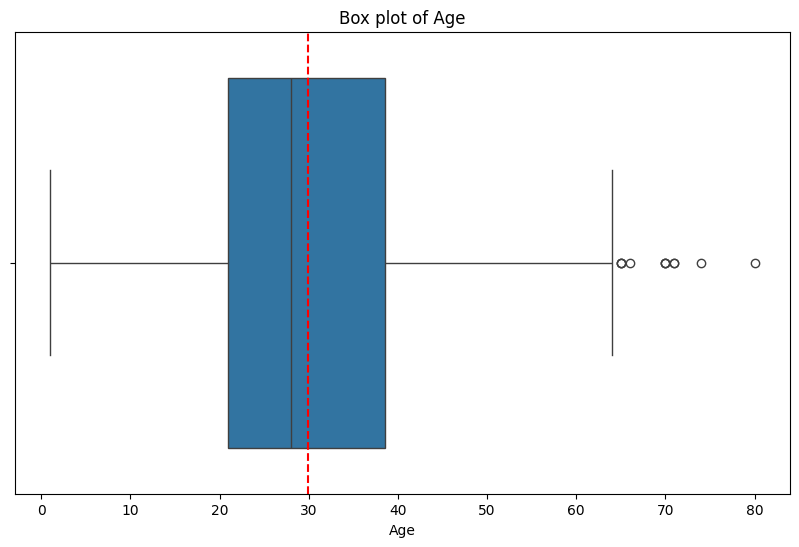

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['Age'], orient='h')
plt.title('Box plot of Age')
plt.axvline(df['Age'].mean(), color='red', linestyle='--', label=f"Mean Age = {df['Age'].mean():.2f}")
plt.xlabel('Age')
plt.show()